# HOMEWORK6

6.1 Register for a stream of Twitter data

In [58]:
%%writefile C:/Users/Pavani/Desktop/Homework6/Tweet_app.py
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy.auth import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "2261482722-PMBgA0HwYWyp3u4DArihMe8dZ80U1gANlLE5sqZ"
access_token_secret = "Ta1oaaSKzb9fNtgzVxwHyZWvmsMypSefaUv11fKZDsWdh"
consumer_key = "6kfpQ4WnZJVGUO4sr0sCbVnzw"
consumer_secret = "eYVqcpObN3AlhdhBM5uGTiGkMvPJBMzcAk4A3lKgdJT7EVDMCH"

# This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):
    def on_data(self, data):
        
        #file=open("TweetOut.txt","a")
        #file.write(data)
        print(data)
        return True

    def on_error(self, status):
        print (status)


if __name__ == '__main__':
    # This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    # This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'

    stream.filter(track=['Big Data', 'IoT','Cloud'])

Overwriting C:/Users/Pavani/Desktop/Homework6/Tweet_app.py


In [ ]:
%%cmd
python C:/Users/Pavani/Desktop/Homework6/Tweet_app.py > C:/Users/Pavani/Desktop/Homework6/Tweet_Out.txt

In [21]:
import json
import pandas as pd
t_list = []
t_file = open("Tweet_Out.txt", "r")
for line in t_file:
    try:
        tweet = json.loads(line)
        t_list.append(tweet)
    except:
        continue
print len(t_list)
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], t_list)
tweets['lang'] = map(lambda tweet: tweet['lang'], t_list)
tweets['time_zone'] = map(lambda tweet: tweet['user']['time_zone'], t_list)
tweets.head(5)


439


,text,lang,time_zone
0,#IoT #SSP #Comunidade #AntonioCarlos #JoaoFred...,und,Pacific Time (US & Canada)
1,RT @MicrosoftMSM: Don’t Let Your #Cloud Projec...,en,America/Chicago
2,RT @VertiAI: #BigData to be launched next Apri...,en,Pacific Time (US & Canada)
3,RT @VertiAI: #BigData to be launched next Apri...,en,Pacific Time (US & Canada)
4,Restful API Interface Using Android Things htt...,en,Eastern Time (US & Canada)


In [3]:
tweet_text=tweets.loc[tweets['lang']=='en','text']
t_text_without_urls = tweet_text.str.replace('http\S+|www.\S', ' ', case=False)#removing URLs in tweet_text
cleand_tweets=t_text_without_urls.str.replace('@[A-Za-z0-9]|[^0-9A-Za-z \t]|RT+.*|[^A-Za-z]',' ', case=False)#removing special characters
cleand_tweets.str.split(' ', expand=True).stack().unique()
cleand_tweets.str.split(' ', expand=True).stack().value_counts().head(10)

         780
The       17
to        16
of        13
IoT       12
Cloud     12
cloud     10
the       10
and        9
in         9
dtype: int64

In [20]:
from nltk.corpus import stopwords
import numpy as np

s = stopwords.words('english')#eliminates stop word
No_stopwords=cleand_tweets.apply(lambda x: ' '.join([word for word in x.split() if word not in (s)]))
cleaned_without_stopwords=No_stopwords.str.split(' ', expand=True).stack().unique()
No_stopwords.str.split(' ', expand=True).stack().value_counts()
print cleaned_without_stopwords

np.savetxt(r'english/test.txt', cleaned_without_stopwords, fmt='%s')

['' u'The' u'latest' u'Industrial' u'Internet' u'Things' u'Daily' u'iot'
 u'INCI' u'Digital' u'IoT' u'IIoT' u'AI' u'Disruption' u'IR' u'Boston'
 u'Dynamics' u'Atlas' u'Robot' u'Is' u'A' u'Parkour' u'Sensors'
 u'SelfDriving' u'Cc' u'MassEffect' u'squad' u'point' u'today' u'Cloud'
 u'Dark' u'Evil' u'Siren' u'onSoonCosplay' u'asseffect' u'ioware'
 u'Anshuman' u'Global' u'Post' u'Quantum' u'Cryptography' u'Communications'
 u'Quantumcomputing' u'icotracker' u'What' u'beauty' u'look' u'like' u'ico'
 u'boosteroid' u'cloudcomputing' u'Why' u'sma' u'I' u'favorited'
 u'Vulfpeck' u'Back' u'Pocket' u'Moods' u'ReGroove' u'Sound' u'Sadma'
 u'Sula' u'Original' u'mix' u'Official' u'Wired' u'Top' u'Stories' u'via'
 u'ikeYuhn' u'Pentagon' u'Left' u'Data' u'Exposed' u'W' u'see' u'Big'
 u'data' u'next' u'frontier' u'innovation' u'competition' u'Economics'
 u'story' u'Shore' u'World' u'C' u'xplorationproj' u'rain' u'misty'
 u'standing' u'low' u'cloud' u'Google' u'ramp' u'Japan' u'eyes' u'Market'
 u'big' u'

In [21]:
#creates other dataset but with same keywords
import json
import pandas as pd
from nltk.corpus import stopwords
import numpy as np

t_list = []
t_file = open("Tweet_Out1.txt", "r")
for line in t_file:
    try:
        tweet = json.loads(line)
        t_list.append(tweet)
    except:
        continue
        
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], t_list)
tweets['lang'] = map(lambda tweet: tweet['lang'], t_list)
tweets['time_zone'] = map(lambda tweet: tweet['user']['time_zone'], t_list)
tweets.head(5)

tweet_text=tweets.loc[tweets['lang']=='en','text']
t_text_without_urls = tweet_text.str.replace('http\S+|www.\S', ' ', case=False)
cleand_tweets=t_text_without_urls.str.replace('@[A-Za-z0-9]|[^0-9A-Za-z \t]|RT+.*|[^A-Za-z]',' ', case=False)
cleand_tweets.str.split(' ', expand=True).stack().unique()
cleand_tweets.str.split(' ', expand=True).stack().value_counts().head(10)

stop = stopwords.words('english')
No_stopwords=cleand_tweets.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
cleaned_without_stopwords_1=No_stopwords.str.split(' ', expand=True).stack().unique()
No_stopwords.str.split(' ', expand=True).stack().value_counts()

np.savetxt(r'english/test1.txt', cleaned_without_stopwords_1, fmt='%s')


6.2 Create a bloom filter classifying two days worth of twitters ( after removing stop words and urls )

In [22]:
from pybloom import BloomFilter
import os
import re

a = {i: open('English/' + i).read() for i in os.listdir('English/')}
b = {i: set(re.split("\W+", j.lower())) for i, j in a.items()}
d = {}
for i,j in b.items():
    print i,j
    d[i] = BloomFilter(capacity=len(j), error_rate=0.1)
    for j in j:
        d[i].add(j)


test1.txt set(['', 'gt', 'chain', 'global', 'infographic', 'sleep', 'go', 'eepskymike', 'hedy', 'thursday', 'th', 'atlas', 'giga', 'mph', 'every', 'cyberrisk', 'small', 'says', 'winds', 'htt', 'dynamics', 'investment', 'what', 'clocked', 'goes', 'new', 'leia', 'concepts', 'hours', 'operating', 'makeyourownlane', 'strong', 'cloudcomputing', 'battling', 'economics', 'cindy', 'published', 'via', 'useful', 'mobility', 'app', 'castlerock', 'market', 'experimentation', 'standing', 'use', 'takes', 'springdale', 'blockchain', 'devops', 'suppo', 'next', 'vineyard', 'call', 'calm', 'mysterious', 'today', 'holy', 'infosec', 'disruption', 'producing', 'moses', 'this', 'ml', 'mo', 'anywhere', 'v', 'trans', 'mirrors', 'agent', 'spanning', 'siren', 'get', 'machine', 'beauty', 'may', 'regroove', 'asseffect', 'data', 'a', 'robot', 'st', 'shore', 'enter', 'wine', 'lifecycles', 'move', 'trade', 'course', 'left', 'japan', 'style', 'pharma', 'fix', 'socialmedia', 'actually', 'systems', 'deformation', 'good

6.3 For another days worth of twitter data find the previous twitters that match in the bloom filter (This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

In [23]:
from dynamic_pybloom import ScalableBloomFilter
obj = ScalableBloomFilter(mode=ScalableBloomFilter.SMALL_SET_GROWTH)

for word in cleaned_without_stopwords:
    obj.add(word)
len(obj)
m= 0
mm = 0
for i in cleaned_without_stopwords_1:#compares both datasets but with same keywords
    if i in obj:
        m += 1
    else:
        mm += 1
    
print(m)
print(mm)

405
0


6.4 Plot a historgram of matches for each twitter in 5.3

[<matplotlib.text.Text at 0xee68908>, <matplotlib.text.Text at 0xee6ccc0>]

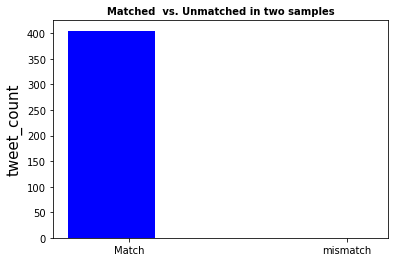

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
x_pos = list(range(2))
y_pos = [m,mm]
width = 0.4
fig, ax = plt.subplots()
plt.bar(x_pos, y_pos, width, alpha=1, color='b')

# Setting axis labels and ticks
ax.set_ylabel('tweet_count', fontsize=15)
ax.set_title('Matched  vs. Unmatched in two samples', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.2 * width for p in x_pos])
ax.set_xticklabels(['Match', 'mismatch'])
#plt.grid()
#Matches are more because, I took two twitter datasets with same keywords. The second one is a smaller dataset. 

# References

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html                           
https://pypi.python.org/pypi/pybloom/1.0.2                                                                  
http://nullege.com/codes/search/pybloom.ScalableBloomFilter                                                                  
https://axiak.github.io/pybloomfiltermmap/                                                                                       
https://pypi.python.org/pypi/pybloomfiltermmap                                                 
http://www.geeksforgeeks.org/removing-stop-words-nltk-python/                                                    
https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python                                